# PCA

In [136]:
#initializing the libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Loading in the Dataframe

In [137]:
# loading in the csv
df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Combined_Teams_2024_Updated.csv')
df.head()

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4,rank,wins,...,move_3_power,move_3_effect,move_3_effect_chance,move_3_accuracy,move_3_generation,move_4_power,move_4_effect,move_4_effect_chance,move_4_accuracy,move_4_generation
0,miraidon,choice specs,hadron engine,fairy,electro-drift,draco-meteor,dazzling-gleam,volt-switch,1,9,...,80.0,Inflicts regular damage.,NaN,100.0,6.0,70.0,"Inflicts regular damage, then the user immedia...",NaN,100.0,5.0
1,ogerpon,hearthflame mask,mold breaker,fire,spiky-shield,ivy-cudgel,wood-hammer,follow-me,1,9,...,120.0,Inflicts regular damage. User takes 1/3 the d...,NaN,100.0,4.0,NaN,"Until the end of this turn, any moves that opp...",NaN,100.0,3.0
2,urshifu,focus sash,unseen fist,water,detect,surging-strikes,close-combat,aqua-jet,1,9,...,120.0,"Inflicts regular damage, then lowers the user'...",100.0,100.0,4.0,40.0,Inflicts regular damage.,NaN,100.0,4.0
3,iron-hands,assault vest,quark drive,bug,drain-punch,wild-charge,fake-out,low-kick,1,9,...,40.0,Inflicts regular damage. Causes the target to...,100.0,100.0,3.0,NaN,Inflicts regular damage. Power increases with...,NaN,100.0,1.0
4,whimsicott,covert cloak,prankster,dark,moonblast,encore,light-screen,tailwind,1,9,...,NaN,Erects a barrier around the user's side of the...,NaN,100.0,1.0,NaN,"For the next three turns, all Pokémon on the u...",NaN,100.0,4.0


In [138]:
#changing the df to only contain teams with a rank of 5 or better
df = df[df['rank'] <= 5]
#reset the index to the new df
df = df.reset_index(drop=True)
#create a new df with only the rank column
df_rank = df['rank']
#add a column header to the rank column
df_rank = pd.DataFrame(df_rank, columns = ['rank'])
df_rank



,rank
0,1
1,1
2,1
3,1
4,1
...,...
115,5
116,5
117,5
118,5


### Preparing the DF to conduct PCA. We will have to remove any labels, and non-quantitative data.

In [139]:
# removing the pokemon name, item, ability, tera type, move names, tounrament, typing, move effect as these are all qualitative and not needed for the model.
df = df.drop(['pokemon', 'item', 'ability', 'tera type', 'move_1', 'move_2', 'move_3', 'move_4', 'tournament', 'type_one', 'type_two','type', 'move_1_effect', 'move_2_effect', 'move_3_effect', 'move_4_effect'  ], axis=1)
# removing the rank, pokemon_generation, and move_generations as these are labels and not needed for the model.
df = df.drop(['rank','pokemon_generation', 'move_1_generation', 'move_2_generation', 'move_3_generation', 'move_4_generation'], axis=1)
# cleaning the df for the NaN values to be replaced with 0 as it reflects either moves with 0 base power or 0 effect chance
df = df.fillna(0)
df

,wins,losses,stat_total,hp,attack,defense,special_attack,special_defense,speed,move_1_power,...,move_1_accuracy,move_2_power,move_2_effect_chance,move_2_accuracy,move_3_power,move_3_effect_chance,move_3_accuracy,move_4_power,move_4_effect_chance,move_4_accuracy
0,9,2,670,100,85,100,135,115,135,100.0,...,100.0,130.0,100.0,90.0,80.0,0.0,100.0,70.0,0.0,100.0
1,9,2,550,80,120,84,60,96,110,0.0,...,100.0,100.0,0.0,100.0,120.0,0.0,100.0,0.0,0.0,100.0
2,9,2,550,100,130,100,63,60,97,0.0,...,100.0,25.0,0.0,100.0,120.0,100.0,100.0,40.0,0.0,100.0
3,9,2,570,154,140,108,50,68,50,75.0,...,100.0,90.0,0.0,100.0,40.0,100.0,100.0,0.0,0.0,100.0
4,9,2,480,60,67,85,77,75,116,95.0,...,100.0,0.0,0.0,100.0,0.0,0.0,100.0,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,13,2,570,94,80,86,122,80,108,55.0,...,95.0,0.0,0.0,100.0,0.0,0.0,100.0,110.0,30.0,70.0
116,13,2,670,100,100,90,150,140,90,150.0,...,100.0,110.0,0.0,85.0,110.0,30.0,70.0,90.0,10.0,100.0
117,13,2,570,85,85,100,95,135,70,0.0,...,90.0,1.0,0.0,90.0,90.0,0.0,100.0,0.0,0.0,100.0
118,13,2,530,95,115,90,80,90,60,65.0,...,100.0,0.0,0.0,85.0,40.0,100.0,100.0,0.0,100.0,100.0


### Verifying that there are no missing values within the DF

In [140]:
# checking for missing values
df.isnull().sum()


wins                    0
losses                  0
stat_total              0
hp                      0
attack                  0
defense                 0
special_attack          0
special_defense         0
speed                   0
move_1_power            0
move_1_effect_chance    0
move_1_accuracy         0
move_2_power            0
move_2_effect_chance    0
move_2_accuracy         0
move_3_power            0
move_3_effect_chance    0
move_3_accuracy         0
move_4_power            0
move_4_effect_chance    0
move_4_accuracy         0
dtype: int64

### Verifying the Data Types

In [141]:
# checking the data types
df.dtypes

wins                      int64
losses                    int64
stat_total                int64
hp                        int64
attack                    int64
defense                   int64
special_attack            int64
special_defense           int64
speed                     int64
move_1_power            float64
move_1_effect_chance    float64
move_1_accuracy         float64
move_2_power            float64
move_2_effect_chance    float64
move_2_accuracy         float64
move_3_power            float64
move_3_effect_chance    float64
move_3_accuracy         float64
move_4_power            float64
move_4_effect_chance    float64
move_4_accuracy         float64
dtype: object

Text(0, 0.5, 'Count')

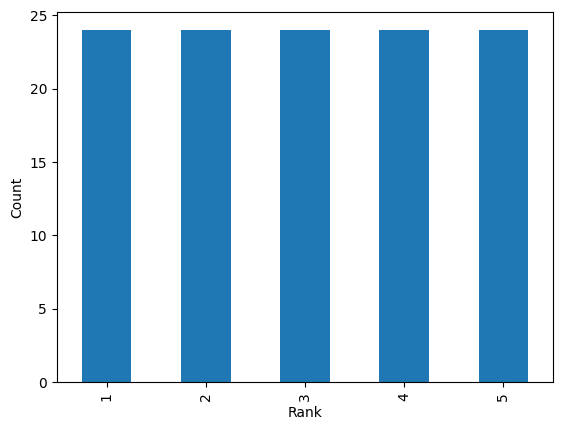

In [142]:
# Class Plots
df_rank['rank'].value_counts().plot(kind='bar')
plt.xlabel('Rank')
plt.ylabel('Count')


### Normalizing the Data

In [143]:
# normalizeing the data using sklearn standard scaler
scaler = StandardScaler()
X_normal = scaler.fit_transform(df)
X_normal


array([[-1.70498585, -0.4662524 ,  2.36347197, ...,  0.96804571,
        -0.41926144,  0.17729688],
       [-1.70498585, -0.4662524 ,  0.10267774, ..., -0.79968993,
        -0.41926144,  0.17729688],
       [-1.70498585, -0.4662524 ,  0.10267774, ...,  0.21044472,
        -0.41926144,  0.17729688],
       ...,
       [ 1.02299151, -0.4662524 ,  0.47947678, ..., -0.79968993,
        -0.41926144,  0.17729688],
       [ 1.02299151, -0.4662524 , -0.2741213 , ..., -0.79968993,
         2.61154414,  0.17729688],
       [ 1.02299151, -0.4662524 , -0.65092034, ..., -0.79968993,
        -0.41926144,  0.17729688]])

### Creating the PCA's

In [144]:
pca = PCA()

principalComponents = pca.fit_transform(X_normal)


In [145]:
principalDF = pd.DataFrame(data = principalComponents)
#change the column names to reflect the principal components
principalDF = pd.DataFrame(data = principalComponents
                           , columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16','PCA17','PCA18','PCA19','PCA20','PCA21' ])


#add the rank column back to the principal components
principalDF = pd.concat([principalDF, df_rank], axis = 1)
#putting the rank column to the front of the df
cols = principalDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
principalDF = principalDF[cols]

principalDF

,rank,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21
0,1,2.090918,-3.181196,-2.669214,0.701285,0.272909,1.688135,0.198064,-0.071503,0.087660,...,-1.073620,-0.306308,-0.654152,-0.294542,-0.623614,0.174255,0.412464,-0.160804,-0.669289,-5.567714e-16
1,1,-0.381021,0.052100,-1.569145,-0.570605,-0.237293,-0.134647,-1.770152,-0.486598,-0.848025,...,0.143588,-0.071660,-1.292075,-1.005769,0.654709,-1.062615,0.139222,-0.381256,-0.047832,-2.911926e-16
2,1,-1.800961,-0.788761,-0.012953,-1.181963,0.153442,-0.511965,-1.396873,-0.690806,-2.823347,...,-0.575974,0.782637,-0.930816,0.525676,-0.557970,0.101071,0.172764,0.099941,0.090667,1.887574e-17
3,1,-3.222997,-0.907255,-0.832984,-1.149053,1.629892,-0.024937,-0.548046,-1.315400,-0.806412,...,-0.933219,1.698296,0.971526,0.359950,-0.534342,-0.009492,-0.761622,-0.384767,-0.332420,-6.447427e-16
4,1,0.772457,2.434955,-0.486496,0.971478,1.145365,0.086839,-1.540500,1.298270,-0.858646,...,0.092099,0.415288,-0.240607,0.944057,-0.016768,0.359419,0.608602,0.161697,-0.421763,4.743921e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5,1.436189,-0.362798,4.319361,6.450819,-0.173501,1.215936,1.421409,-1.843467,-1.296216,...,0.614728,2.423791,-0.041883,0.462701,2.092463,-0.018198,-0.451029,-0.425830,-0.599432,-5.209261e-17
116,5,3.298162,-4.710600,1.565845,-2.036319,0.726791,2.613966,-0.805624,0.266650,1.592879,...,0.935127,-1.521430,2.593094,-0.579372,0.429738,0.584865,-0.525130,-0.216845,0.124233,5.258779e-17
117,5,1.447785,0.056472,0.846098,-1.052257,0.521161,-0.470064,0.930321,-1.841635,-0.297979,...,0.024395,-2.298858,-1.103823,0.437938,1.434556,-1.123796,0.886152,-0.570714,-1.033197,-1.182141e-16
118,5,-0.448996,-0.020773,1.806847,-2.015411,2.852718,-0.044598,2.316417,0.427951,-1.189329,...,-0.994276,-0.722908,0.108860,0.334009,0.183469,0.255913,0.106125,-0.246531,-0.029278,4.020858e-17


### Calculating the Eigen Values

In [146]:
#calculating the top 3 eigenvalues of the principalDF
eigenvalues = pca.explained_variance_.round(4)
eigenvalues[:3]

array([3.3242, 2.4707, 1.9596])

### Calculating the Explained Variance of each PCA

In [147]:
# computing the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# cummulating the explained variance to 4 decimal places
pca.explained_variance_ratio_.cumsum().round(4)

#
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance



array([0.15697814, 0.27364832, 0.36618539, 0.44187761, 0.51262755,
       0.5702035 , 0.62714793, 0.67605025, 0.72131085, 0.76496099,
       0.80455594, 0.84009588, 0.87049888, 0.89668981, 0.92216818,
       0.94448518, 0.96362826, 0.98139655, 0.9931131 , 1.        ,
       1.        ])

In [148]:
#put the cumulative variance into a df and have them be percentages
cumulative_variance_df = pd.DataFrame(cumulative_variance)
cumulative_variance_df = cumulative_variance_df*100
cumulative_variance_df = cumulative_variance_df.round(2)
#start the index at 1
cumulative_variance_df.index += 1
#change the column header from 0 to Cumulative Variance
cumulative_variance_df.columns = ['Cumulative Variance']
cumulative_variance_df


,Cumulative Variance
1,15.70
2,27.36
3,36.62
4,44.19
5,51.26
6,57.02
7,62.71
8,67.61
9,72.13
10,76.50


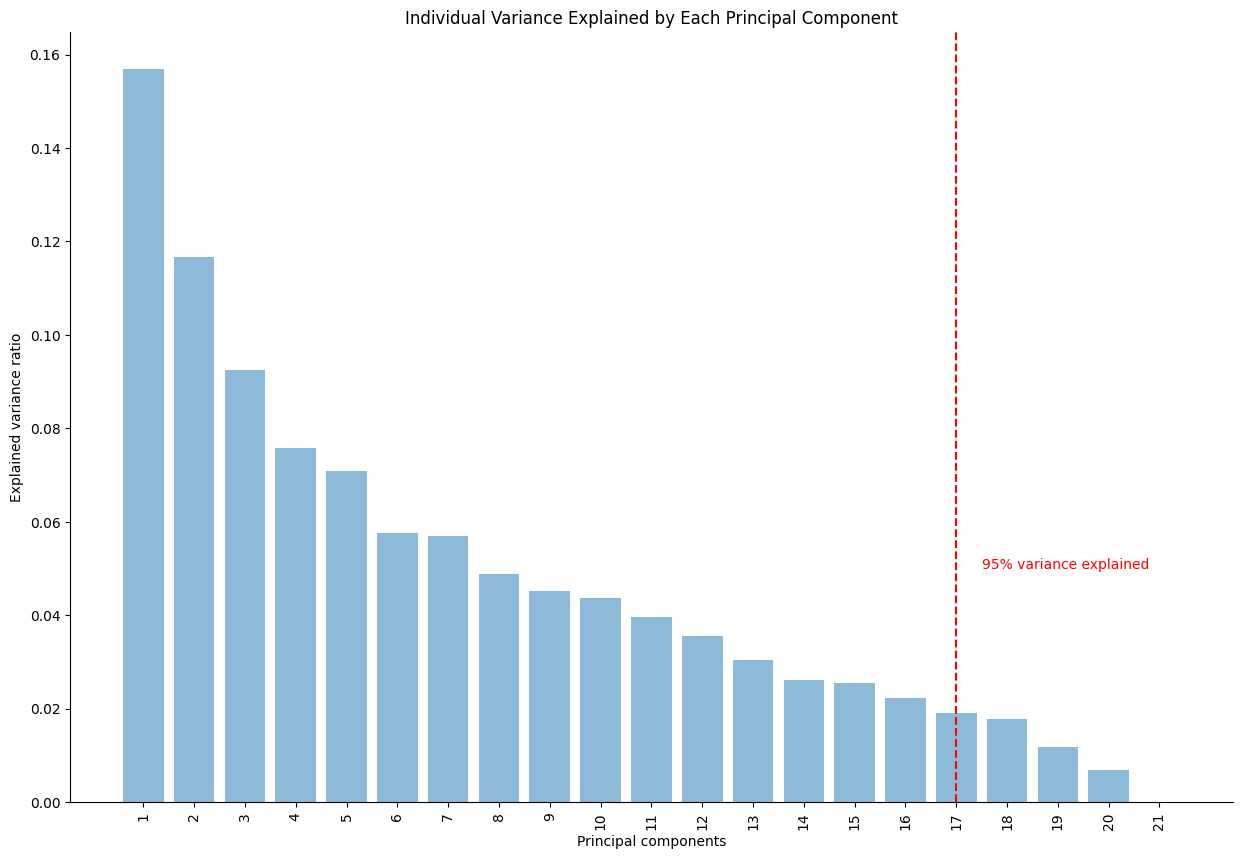

In [149]:
#
plt.figure()
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.title('Individual Variance Explained by Each Principal Component')
plt.grid(True)
# make the x-axis labels vertical
plt.xticks(rotation=90)
# make the plot bigger so we can read the x-axis labels
plt.gcf().set_size_inches(15, 10)
#put a vertical line at 16 and call it the '95% variance explained' line
plt.axvline(x=17, color='r', linestyle='--')
#put a label on the dashed line and call it the '95% variance explained' line
plt.text(17.5, 0.05, '95% variance explained', color = 'red')
#removing the grid lines
plt.grid(False)
#removing the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### Conducting PCA with the top two Componenets

In [150]:
# creating a new df with only the first 2 principal components
principalDF_2 = principalDF[['PCA1', 'PCA2', 'rank']]
principalDF_2

,PCA1,PCA2,rank
0,2.090918,-3.181196,1
1,-0.381021,0.052100,1
2,-1.800961,-0.788761,1
3,-3.222997,-0.907255,1
4,0.772457,2.434955,1
...,...,...,...
115,1.436189,-0.362798,5
116,3.298162,-4.710600,5
117,1.447785,0.056472,5
118,-0.448996,-0.020773,5


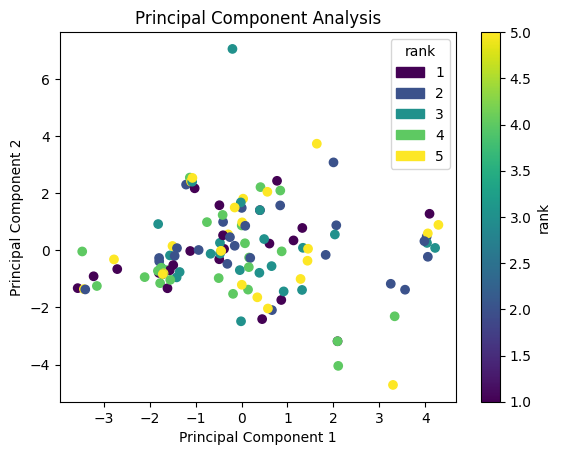

In [151]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a scatter plot
plt.figure()
scatter = plt.scatter(principalDF_2['PCA1'], principalDF_2['PCA2'], 
                      c=principalDF_2['rank'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')

# Create a color bar
plt.colorbar(scatter, label='rank')

# Generate custom legend by manually creating handles
handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=str(i)) for i in range(1, 6)]
plt.legend(handles=handles, title='rank')
#drop the color bar from the visualization
#plt.colorbar(scatter, label='Pokemon Generation').remove()

plt.show()



### Conducting PCA with the top 3 Componenets

In [152]:
# creating a new df with only the first 3 principal components
principalDF_3 = principalDF[['PCA1', 'PCA2', 'PCA3', 'rank']]

#save the df to a csv
principalDF_3.to_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 2/PCA/PCA_3.csv', index=False)

principalDF_3

,PCA1,PCA2,PCA3,rank
0,2.090918,-3.181196,-2.669214,1
1,-0.381021,0.052100,-1.569145,1
2,-1.800961,-0.788761,-0.012953,1
3,-3.222997,-0.907255,-0.832984,1
4,0.772457,2.434955,-0.486496,1
...,...,...,...,...
115,1.436189,-0.362798,4.319361,5
116,3.298162,-4.710600,1.565845,5
117,1.447785,0.056472,0.846098,5
118,-0.448996,-0.020773,1.806847,5


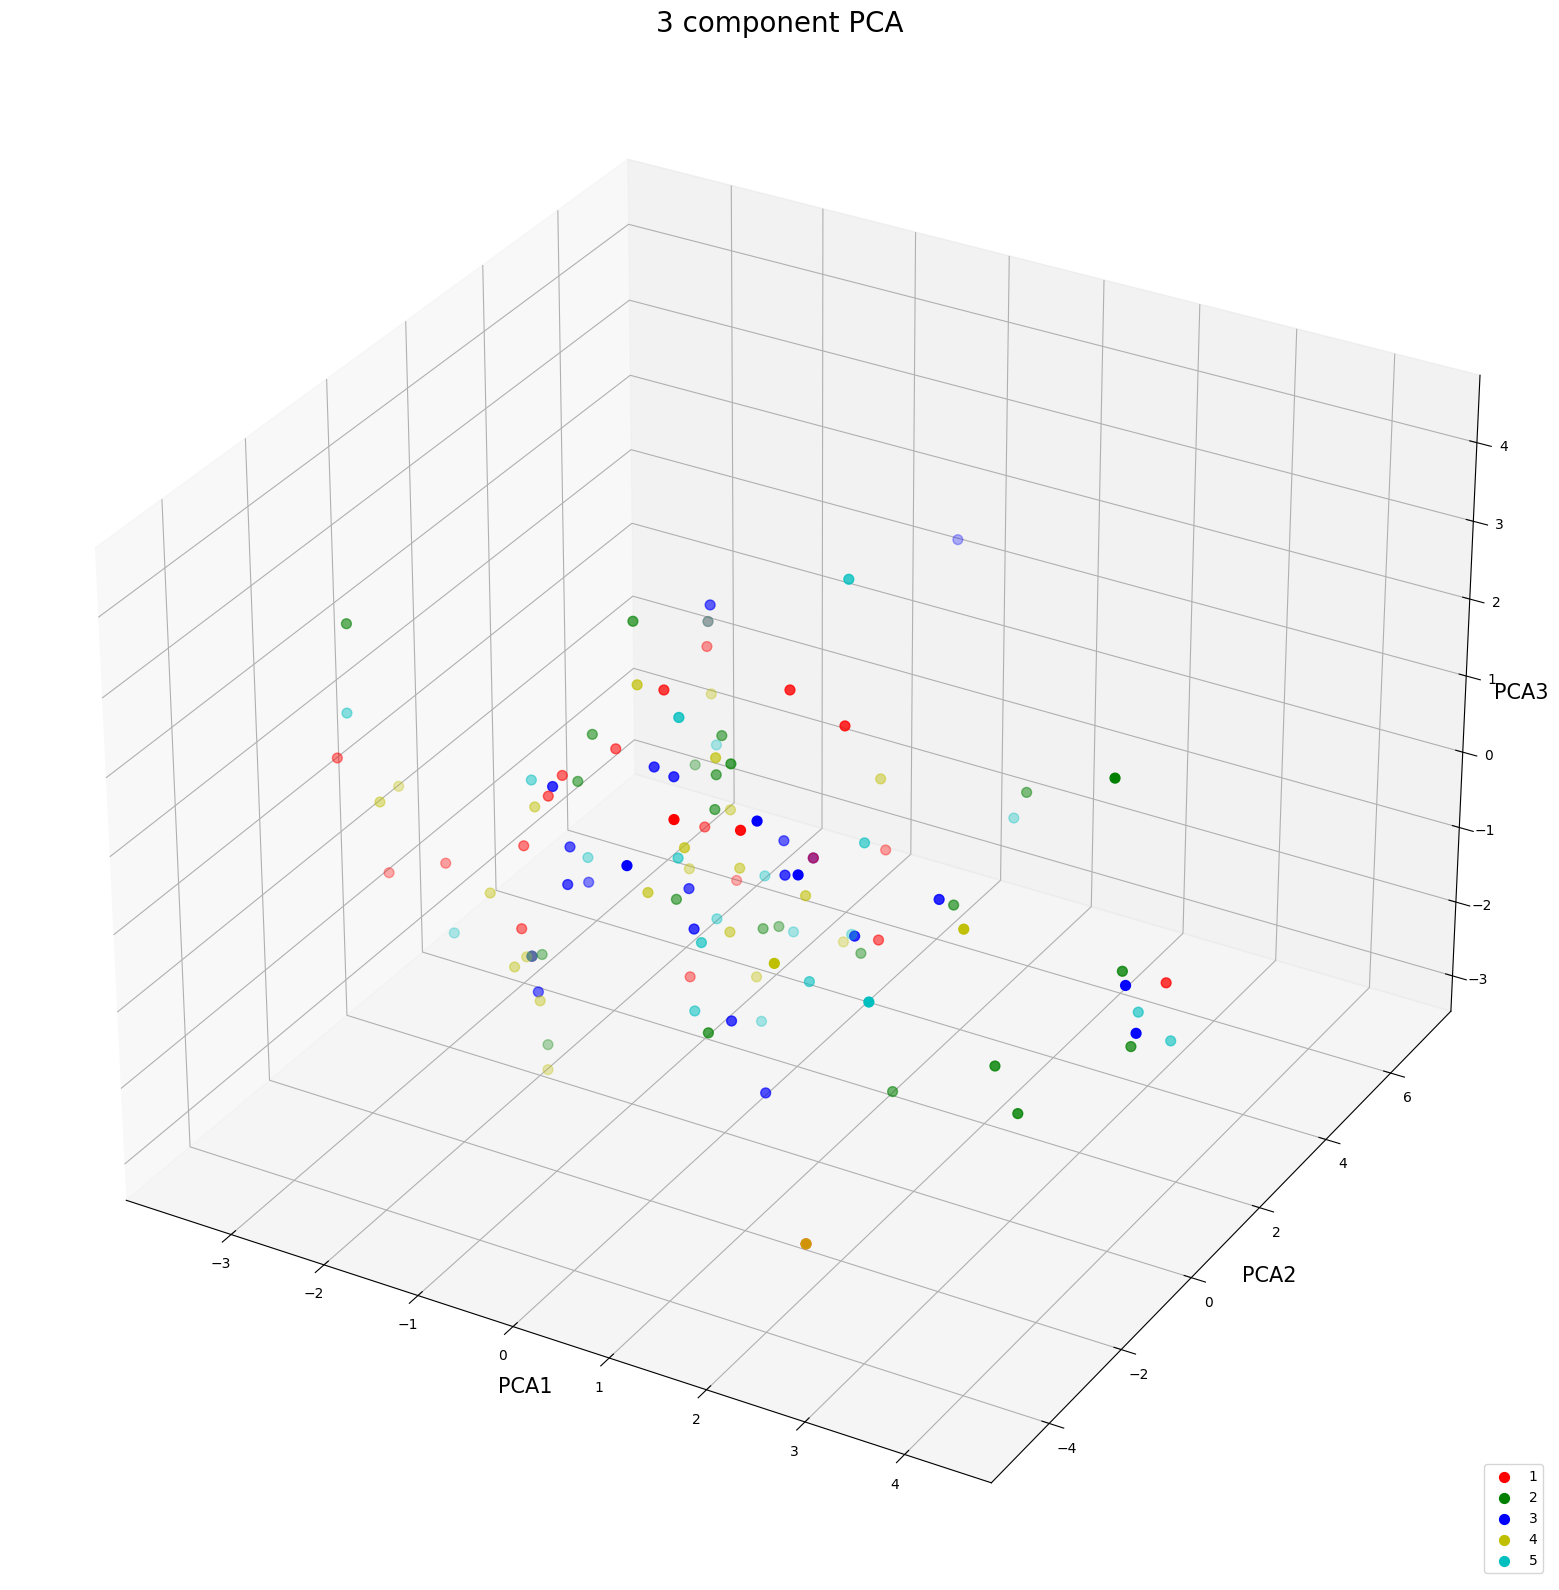

In [153]:
fig = plt.figure(figsize = (30,20))
ax = fig.add_subplot(1,1,1,  projection='3d')
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_zlabel('PCA3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targetsName = ['1', '2', '3', '4', '5']

targets = [1,2,3,4,5]
colors = ['r', 'g', 'b', 'y', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = principalDF_3['rank'] == target
    ax.scatter(  principalDF_3.loc[indicesToKeep, 'PCA1']
               , principalDF_3.loc[indicesToKeep, 'PCA2']
               , principalDF_3.loc[indicesToKeep, 'PCA3']
               , c = color
               , s = 50)
ax.legend(targetsName)
#move the legend to being in the plot
ax.legend(targetsName, loc='lower right')
ax.grid()